<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez.
<br>
<i><b>Asignatura:</b></i> Modelos predictivos
<br>
<i><b>Estudiante:</b></i> Esteban Rodriguez y Santiago Niño
<br>
<i><b>Tema:</b></i> Parcial #3 - Parte 1
<br>
<br>
17/11/2022
<br>
</FONT>
</div>

#Enunciado

Explicar en qué consiste cada dataset escojido y qué se quiere predecir:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import pairwise_distances, accuracy_score, mean_squared_error,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
import joblib
from joblib import load

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/estebanrodriguez02/DataSets/main/winequality-white.csv", delimiter=";")

Para este modelo se pretende predecir la calidad del vino blanco con respecto a sus diferentes caracteristicas quimicas. Inicialmente, este valor varia en diferentes clases como por ejemplo: 3,4,5,6,7,8,9 siendo el número mayor la calidad más alta. Por esta razón, el modelo de Machine Learning a usar debe ser de clasificación.

Usando el dataset elegido para regresión o clasificación:







In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Realizar un análisis exploratorio. Solo se deben presentar las gráficas de las que se diga algo en el análisis.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

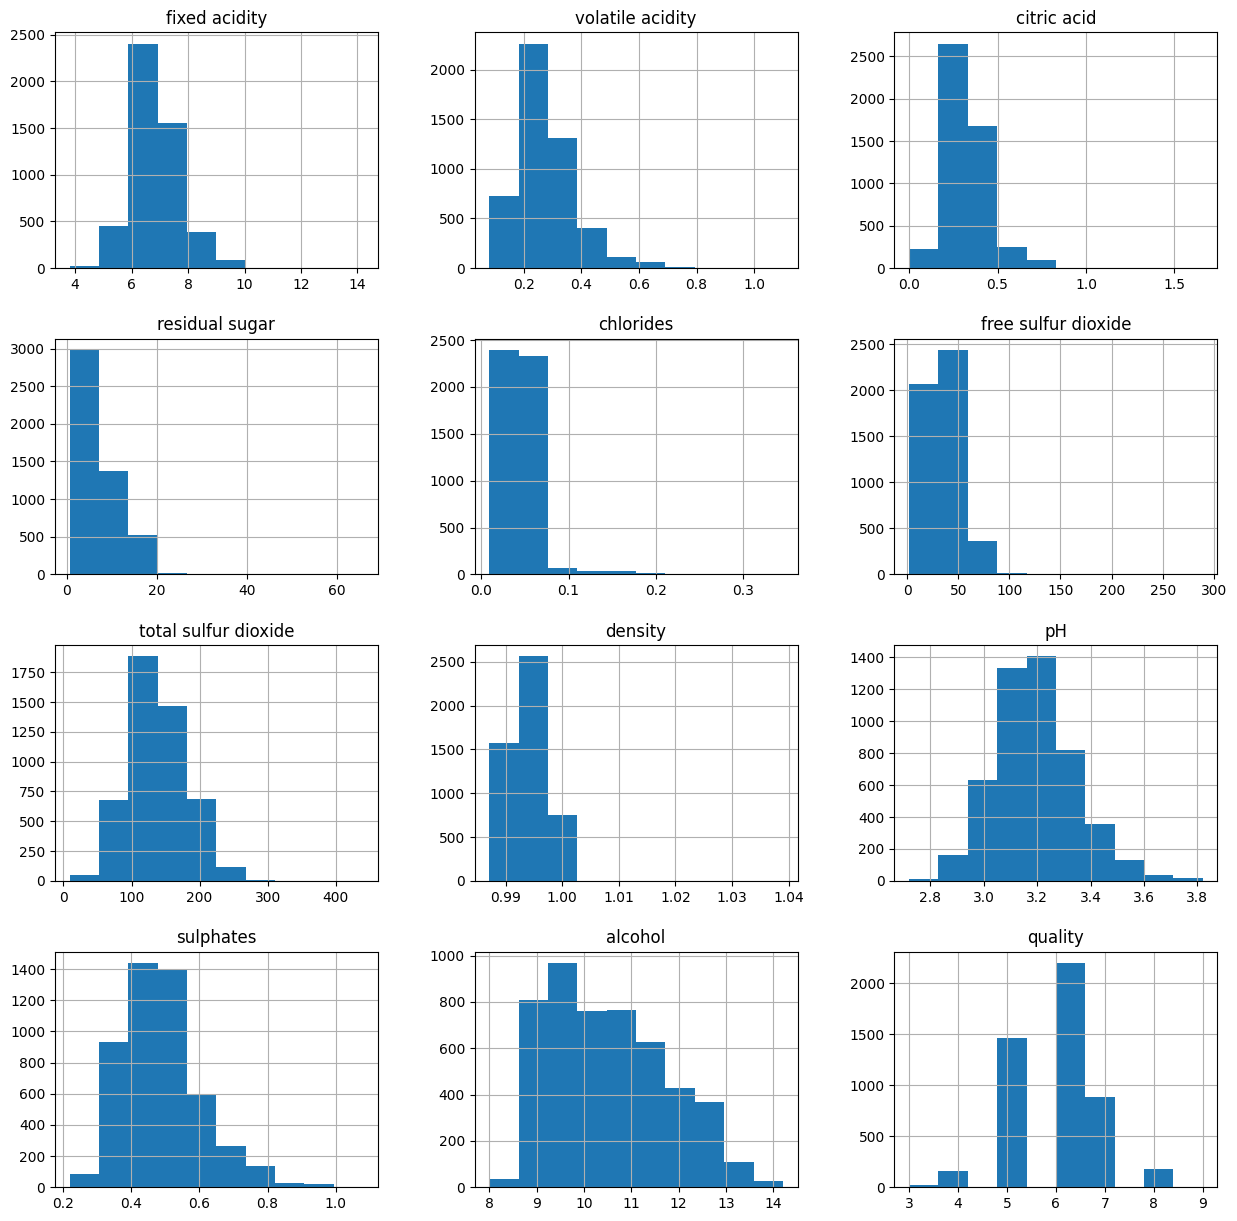

In [ ]:
df.hist(figsize=(15,15))

Con ayuda de los histogramas, se evidencia que la calidad del vino varia entre 4 y 8. Sin embargo, existen algunos valores atípicos ya que la mayoría se encuentran entre 5 y 6 perjudicando una posible predicción.

In [ ]:
df["fixed acidity"].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64

In [ ]:
df["volatile acidity"].describe()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64

In [ ]:
df["citric acid"].describe()

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [ ]:
df["residual sugar"].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

In [ ]:
df["chlorides"].describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [ ]:
df["free sulfur dioxide"].describe()

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [ ]:
df["total sulfur dioxide"].describe()

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [ ]:
df["density"].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

In [ ]:
df["pH"].describe()

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

In [ ]:
df["sulphates"].describe()

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

In [ ]:
df["alcohol"].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [ ]:
df["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [ ]:
df.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Percentiles: 25th=5.00, 75th=6.00, IQR=1.00
Identified outliers: 200
Non-outlier observations: 4698


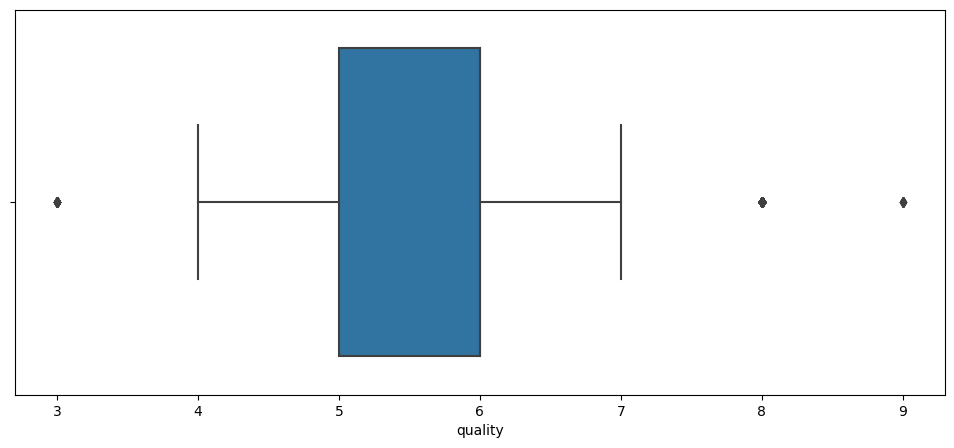

In [ ]:
from numpy.random import randn
from numpy import percentile
import seaborn as sns

q25, q75 = percentile(df["quality"], 25), percentile(df["quality"], 75)
iqr = q75 - q25
print('Percentiles: 25th={:.2f}, 75th={:.2f}, IQR={:.2f}'.format(q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df["quality"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df["quality"] if x >= lower and x <= upper]
print('Non-outlier observations: {}'.format(len(outliers_removed)))
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["quality"])
plt.show()

Luego de realizar la eliminación de valores atípicos, la distribución se vería de la siguiente forma.

Identified outliers: 200
Non-outlier observations: 4698


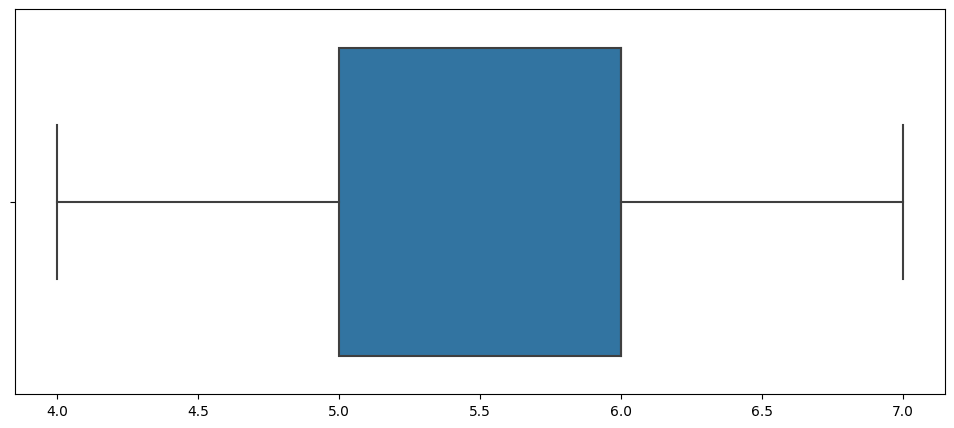

In [ ]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df["quality"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df["quality"] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

plt.figure(figsize=(12, 5))
sns.boxplot(x=outliers_removed)
plt.show()

<Axes: >

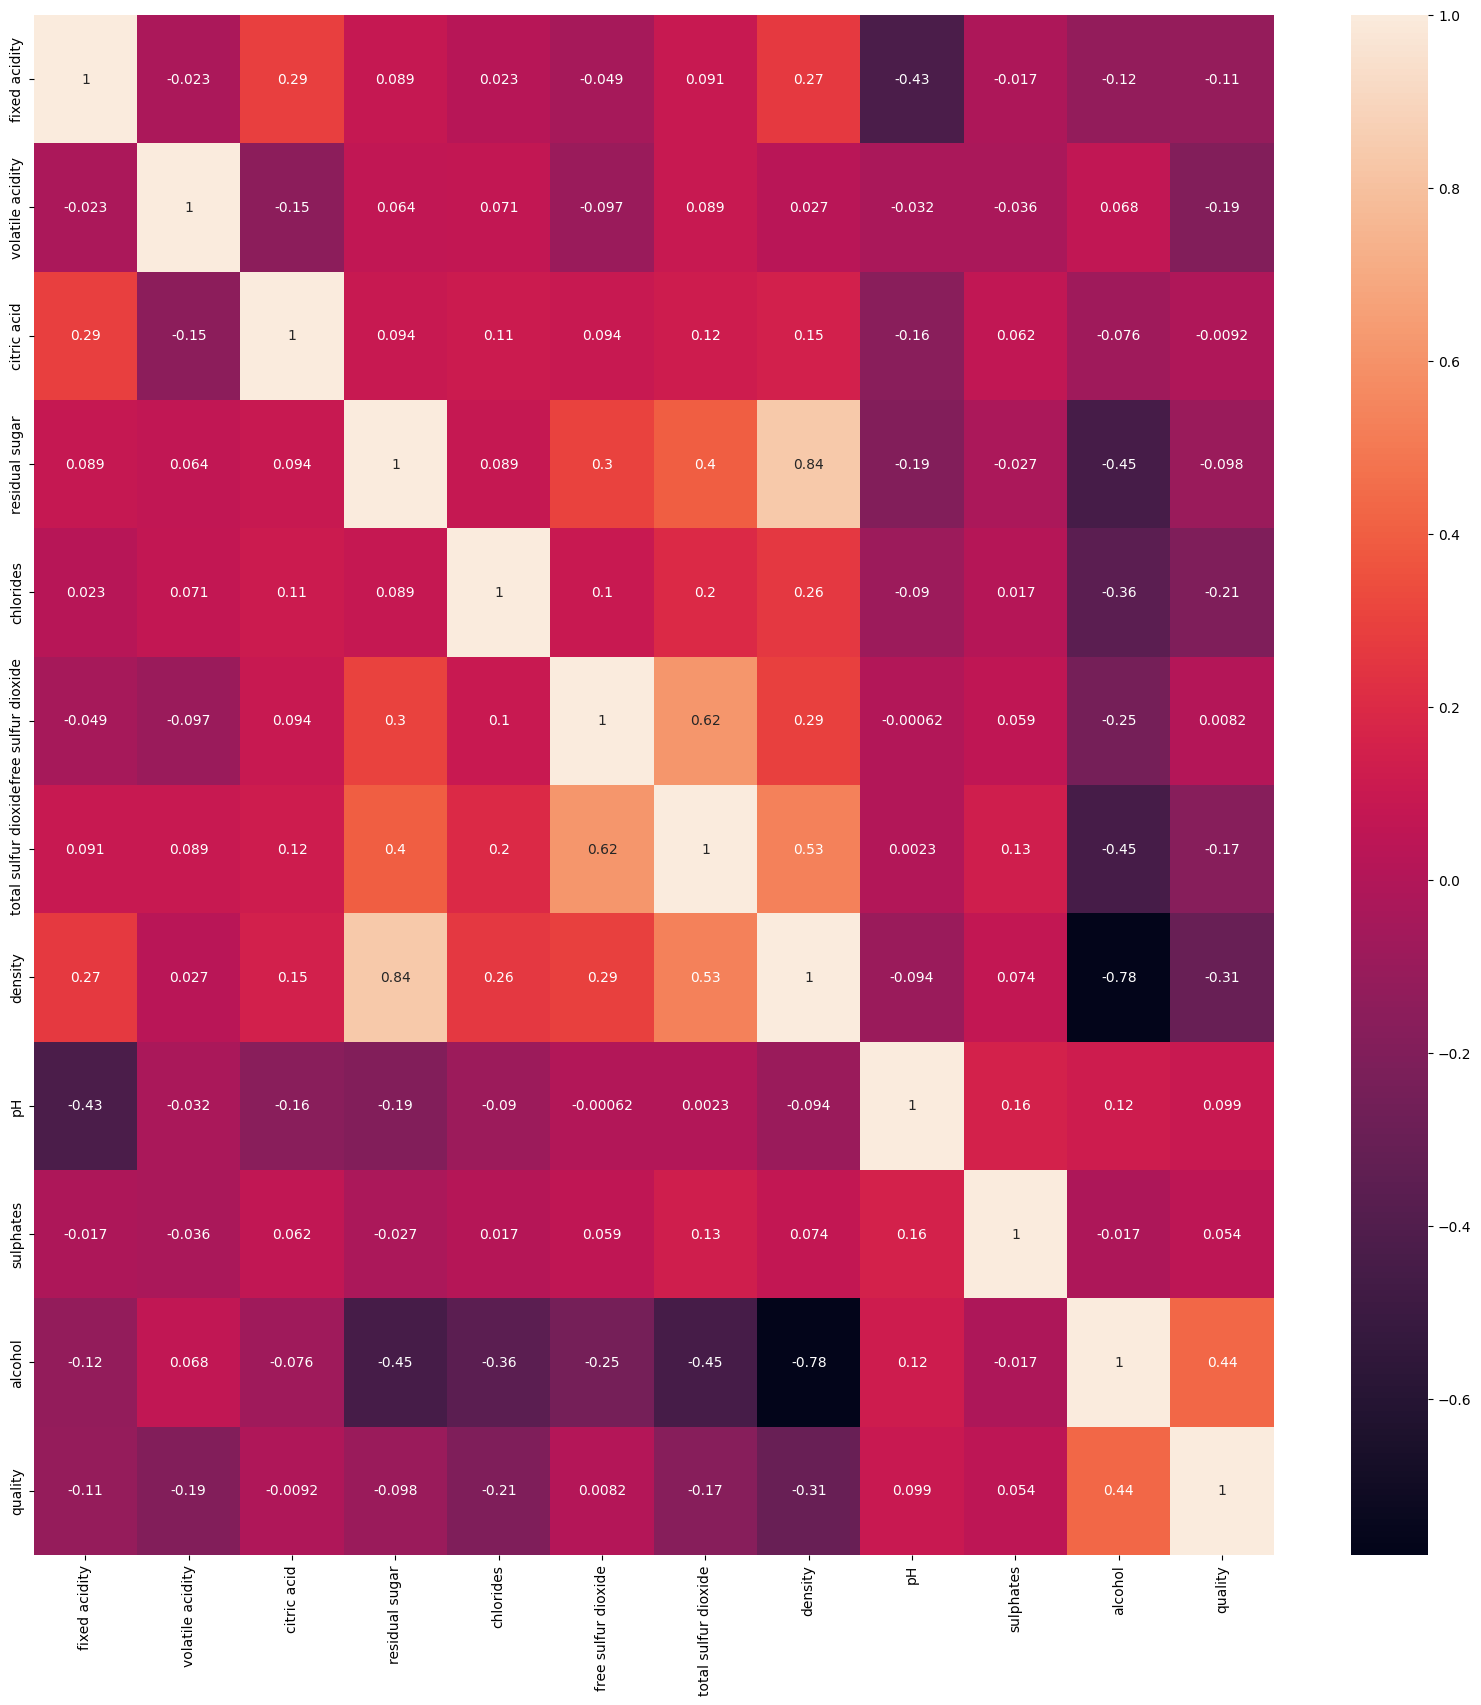

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [ ]:
df.corr().quality.to_frame()

,quality
fixed acidity,-0.113663
volatile acidity,-0.194723
citric acid,-0.009209
residual sugar,-0.097577
chlorides,-0.209934
free sulfur dioxide,0.008158
total sulfur dioxide,-0.174737
density,-0.307123
pH,0.099427
sulphates,0.053678


A partir del diagrama de correlación, se puede deducir que la caracterísitica química que más influye en la calidad del vino blanco es el la cantidad de alcohol en la sustancia.

# Dividir el conjunto en train y test (verificar la misma distribución de las clases en ambos datasets)

In [ ]:
X = df.drop(['quality'],axis = 1)
y = df['quality']

In [ ]:
X_train, X_test, Y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=44, stratify=y)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

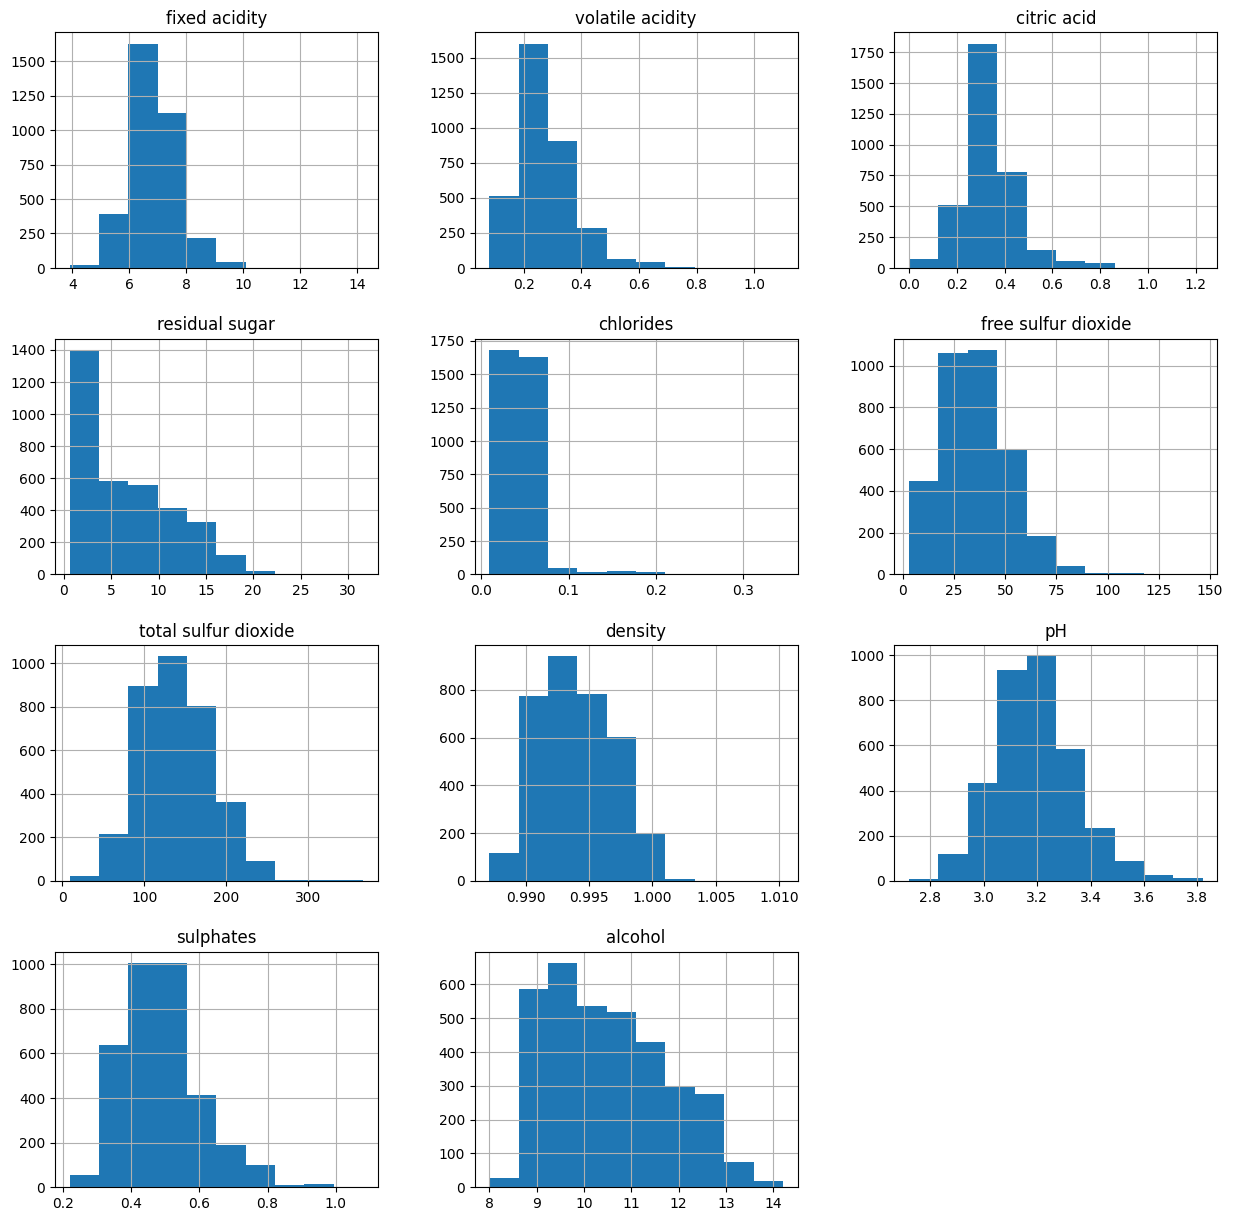

In [ ]:
X_train.hist(figsize=(15,15))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 1091 to 302
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3428 non-null   float64
 1   volatile acidity      3428 non-null   float64
 2   citric acid           3428 non-null   float64
 3   residual sugar        3428 non-null   float64
 4   chlorides             3428 non-null   float64
 5   free sulfur dioxide   3428 non-null   float64
 6   total sulfur dioxide  3428 non-null   float64
 7   density               3428 non-null   float64
 8   pH                    3428 non-null   float64
 9   sulphates             3428 non-null   float64
 10  alcohol               3428 non-null   float64
dtypes: float64(11)
memory usage: 321.4 KB


# Crear un pipeline de preprocesamiento.

In [ ]:
pipeline_numeric = Pipeline([('imputar', SimpleImputer(strategy='median')),
                             ('escalado', MinMaxScaler())])

In [ ]:
column_transformer = ColumnTransformer([("Pipeline_numerico", pipeline_numeric, [0,1,2,3,4,5,6,7,8,9,10])])

In [ ]:
z_train = column_transformer.fit_transform(X_train)

In [ ]:
pd.DataFrame(z_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.320388,0.127451,0.284553,0.448387,0.115727,0.222997,0.472727,0.478223,0.300000,0.290698,0.145161
1,0.242718,0.196078,0.227642,0.077419,0.091988,0.111498,0.248951,0.217766,0.481818,0.290698,0.500000
2,0.291262,0.156863,0.300813,0.177419,0.053412,0.243902,0.288112,0.161708,0.427273,0.139535,0.709677
3,0.242718,0.137255,0.260163,0.212903,0.056380,0.083624,0.206993,0.253989,0.372727,0.383721,0.467742
4,0.330097,0.088235,0.292683,0.245161,0.056380,0.285714,0.285315,0.241915,0.381818,0.220930,0.709677


# Realizar validación cruzada de cv 10 probando mínimo 3 modelos

 Modelo de KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(z_train, Y_train)
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.01288295, 0.01917744, 0.0413363 , 0.00727534, 0.01663494,
        0.02761626, 0.00683188, 0.00707436, 0.01409554, 0.00750661]),
 'score_time': array([0.13115025, 0.13133216, 0.20932937, 0.05195451, 0.05936241,
        0.09381127, 0.05969834, 0.12572718, 0.10085464, 0.07829428]),
 'test_score': array([0.62099125, 0.56851312, 0.51603499, 0.56268222, 0.55102041,
        0.54810496, 0.51311953, 0.55685131, 0.5497076 , 0.55847953]),
 'train_score': array([0.69400324, 0.7082658 , 0.70664506, 0.70405186, 0.70664506,
        0.70340357, 0.70599676, 0.70340357, 0.6941024 , 0.70479585])}

In [ ]:
train_score = model.score(z_train, Y_train)
print("Coefficient of determination in the training set: ", train_score*100,"%")

Coefficient of determination in the training set:  70.91598599766627 %


Porcentaje de precision

In [ ]:
results = cross_validate(model, z_train, Y_train, cv=5, return_train_score=True)
results

print(f"Acc train: {results['train_score'].mean()*100}",
      "+-", f"Acc train: {results['train_score'].std()}")

print("+-", f"Acc validation: {results['test_score'].mean()*100}",
      "+-", f"Acc validation: {results['test_score'].std()}")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Acc train: 69.7417975016573 +- Acc train: 0.003949002796200275
+- Acc validation: 54.92979506714052 +- Acc validation: 0.011298134270543657


In [ ]:
grid = {"n_neighbors": [2, 6, 8],
        "weights": ["uniform", "distance"]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    grid,
    cv = 4,
    return_train_score=True,
    scoring='accuracy'
)

In [ ]:
grid_search.fit(z_train, Y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 6, 8],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [ ]:
grid_search.best_score_


0.6306884480746792

Metricas de rendimiento en clasificación

In [ ]:
predicte_quality = model.predict(z_train)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(Y_train, predicte_quality))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.62      0.37      0.46       114
           5       0.69      0.76      0.73      1020
           6       0.72      0.78      0.75      1538
           7       0.71      0.62      0.67       616
           8       0.85      0.29      0.43       122
           9       0.00      0.00      0.00         4

    accuracy                           0.71      3428
   macro avg       0.51      0.40      0.43      3428
weighted avg       0.71      0.71      0.70      3428



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_train,predicte_quality)

array([[   0,    3,    7,    4,    0,    0,    0],
       [   0,   42,   44,   22,    5,    1,    0],
       [   1,   16,  777,  211,   15,    0,    0],
       [   0,    7,  245, 1193,   90,    3,    0],
       [   0,    0,   43,  187,  384,    2,    0],
       [   0,    0,    2,   42,   43,   35,    0],
       [   0,    0,    1,    2,    1,    0,    0]])

Modelo Random Forest Clasifier

In [ ]:
model = RandomForestClassifier(max_depth=10)
model.fit(z_train, Y_train)
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.66379762, 0.65975499, 0.62955999, 0.6299448 , 0.63345766,
        0.65197945, 0.84371591, 0.94111967, 0.91819835, 1.16875243]),
 'score_time': array([0.02148461, 0.02172542, 0.02241921, 0.01846457, 0.02021599,
        0.0186584 , 0.02686262, 0.02645159, 0.01887751, 0.07368231]),
 'test_score': array([0.63265306, 0.60349854, 0.63265306, 0.61516035, 0.63556851,
        0.61516035, 0.63848397, 0.62390671, 0.63450292, 0.62865497]),
 'train_score': array([0.84862237, 0.85640194, 0.8547812 , 0.85445705, 0.85672609,
        0.85316045, 0.86256078, 0.86029173, 0.85677252, 0.85774465])}

Porcentaje de precisión

In [ ]:
train_score = model.score(z_train, Y_train)
print("Coefficient of determination in the training set: ", train_score*100,"%")

Coefficient of determination in the training set:  84.77246207701283 %


In [ ]:
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

print(f"Acc train:", results['train_score'].mean()*100,
    "+-", results['train_score'].std())
print(f"Acc val:", results['test_score'].mean()*100,'%',
    "+-", results['test_score'].std()*100,'%')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Acc train: 85.84209547798338 +- 0.0039252833348506514
Acc val: 62.66022198353025 % +- 0.8830890036206659 %


Métricas de regresión

In [ ]:
print(metrics.classification_report(Y_train, predicte_quality))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.62      0.37      0.46       114
           5       0.69      0.76      0.73      1020
           6       0.72      0.78      0.75      1538
           7       0.71      0.62      0.67       616
           8       0.85      0.29      0.43       122
           9       0.00      0.00      0.00         4

    accuracy                           0.71      3428
   macro avg       0.51      0.40      0.43      3428
weighted avg       0.71      0.71      0.70      3428



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_train,predicte_quality)

array([[   0,    3,    7,    4,    0,    0,    0],
       [   0,   42,   44,   22,    5,    1,    0],
       [   1,   16,  777,  211,   15,    0,    0],
       [   0,    7,  245, 1193,   90,    3,    0],
       [   0,    0,   43,  187,  384,    2,    0],
       [   0,    0,    2,   42,   43,   35,    0],
       [   0,    0,    1,    2,    1,    0,    0]])

Modelo de DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=12)
model.fit(z_train, Y_train)
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.07174945, 0.05281258, 0.02392745, 0.02378798, 0.02329898,
        0.02293515, 0.02282166, 0.0239749 , 0.02369905, 0.02684259]),
 'score_time': array([0.00198293, 0.00159883, 0.00132799, 0.00127745, 0.00127673,
        0.00144386, 0.00123501, 0.00124073, 0.00127935, 0.00137234]),
 'test_score': array([0.5393586 , 0.51311953, 0.51603499, 0.50728863, 0.56559767,
        0.56268222, 0.5451895 , 0.49562682, 0.5877193 , 0.55263158]),
 'train_score': array([0.8184765 , 0.8363047 , 0.86742301, 0.81491086, 0.83209076,
        0.8350081 , 0.81069692, 0.82787682, 0.81335062, 0.85093973])}

Porcentaje de error

In [ ]:
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

print(f"Acc train:", results['train_score'].mean()*100,
    "+-", results['train_score'].std())
print(f"Acc val:", results['test_score'].mean()*100,'%',
    "+-", results['test_score'].std()*100,'%')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Acc train: 83.10967815123668 +- 0.01692749563844827
Acc val: 54.29031763081172 % +- 3.201118545564389 %


Metricas de rendimiento en clasificación

In [ ]:
predicte_quality = model.predict(z_train)

In [ ]:
print(metrics.classification_report(Y_train, predicte_quality))

              precision    recall  f1-score   support

           3       0.85      0.79      0.81        14
           4       0.99      0.73      0.84       114
           5       0.85      0.82      0.84      1020
           6       0.77      0.92      0.83      1538
           7       0.93      0.66      0.77       616
           8       0.96      0.61      0.74       122
           9       1.00      0.75      0.86         4

    accuracy                           0.82      3428
   macro avg       0.91      0.75      0.81      3428
weighted avg       0.84      0.82      0.82      3428



In [ ]:
confusion_matrix(Y_train,predicte_quality)

array([[  11,    0,    0,    3,    0,    0,    0],
       [   2,   83,   12,   16,    1,    0,    0],
       [   0,    0,  834,  178,    7,    1,    0],
       [   0,    1,  110, 1410,   16,    1,    0],
       [   0,    0,   17,  194,  404,    1,    0],
       [   0,    0,    4,   38,    6,   74,    0],
       [   0,    0,    0,    1,    0,    0,    3]])

# Determinar cuáles son las métricas más adecuadas para este caso y justificar

Las métricas de calidad del modelo en este caso de clasificación, nos indican realmente qué tan confiable es al momento de determinar en el caso del problema a que clase de calidad pertenece el vino. Por lo tanto, tanto Precision, como Recall y F1 deben acercarse a 100%.

# Evaluar resultados. Volver al paso 2 y realizar una o 2 iteraciones más buscando mejorar los resultados.

Modelo de DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(z_train, Y_train)
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.02787113, 0.02796054, 0.02963519, 0.03121686, 0.02768707,
        0.02654028, 0.0303154 , 0.02668285, 0.02602267, 0.02612209]),
 'score_time': array([0.00132203, 0.00128889, 0.00136924, 0.00175214, 0.00128865,
        0.00125504, 0.00137043, 0.00167608, 0.00143528, 0.00127912]),
 'test_score': array([0.55685131, 0.5335277 , 0.51603499, 0.5335277 , 0.60641399,
        0.57725948, 0.55976676, 0.51895044, 0.59649123, 0.5994152 ]),
 'train_score': array([0.91993517, 0.93095624, 0.95364668, 0.89594814, 0.926094  ,
        0.91993517, 0.90858995, 0.93679092, 0.89889825, 0.92709008])}

Porcentaje de error

In [ ]:
results = cross_validate(model, z_train, Y_train, cv=10, return_train_score=True)
results

print(f"Acc train:", results['train_score'].mean()*100,
    "+-", results['train_score'].std())
print(f"Acc val:", results['test_score'].mean()*100,'%',
    "+-", results['test_score'].std()*100,'%')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Acc train: 92.25340036196302 +- 0.016734790099146395
Acc val: 55.485311919253924 % +- 2.9326650507269076 %


Metricas de rendimiento en clasificación

In [ ]:
predicte_quality = model.predict(z_train)

In [ ]:
print(metrics.classification_report(Y_train, predicte_quality))

              precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       0.95      0.94      0.94       114
           5       0.93      0.94      0.94      1020
           6       0.90      0.95      0.92      1538
           7       0.96      0.85      0.90       616
           8       1.00      0.80      0.89       122
           9       1.00      0.75      0.86         4

    accuracy                           0.92      3428
   macro avg       0.96      0.87      0.91      3428
weighted avg       0.93      0.92      0.92      3428



In [ ]:
confusion_matrix(Y_train,predicte_quality)

array([[  12,    0,    0,    2,    0,    0,    0],
       [   0,  107,    2,    5,    0,    0,    0],
       [   0,    2,  963,   52,    3,    0,    0],
       [   0,    3,   62, 1460,   13,    0,    0],
       [   0,    0,    2,   89,  525,    0,    0],
       [   0,    1,    1,   18,    4,   98,    0],
       [   0,    0,    0,    0,    1,    0,    3]])

# Seleccionar el mejor modelo, evaluar en test y realizar un análisis final-

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1091,7.2,0.21,0.35,14.5,0.048,35.0,178.0,0.99820,3.05,0.47,8.9
4713,6.4,0.28,0.28,3.0,0.040,19.0,98.0,0.99216,3.25,0.47,11.1
3046,6.9,0.24,0.37,6.1,0.027,38.0,112.0,0.99086,3.19,0.34,12.4
2804,6.4,0.22,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9
4662,7.3,0.17,0.36,8.2,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
...,...,...,...,...,...,...,...,...,...,...,...
65,6.2,0.35,0.03,1.2,0.064,29.0,120.0,0.99340,3.22,0.54,9.1
3144,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8
1829,7.7,0.44,0.24,11.2,0.031,41.0,167.0,0.99480,3.12,0.43,11.3
4526,5.8,0.27,0.22,12.7,0.058,42.0,206.0,0.99460,3.32,0.38,12.3


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
model.predict_proba([[7.2,0.21,0.34,11.9,0.043,37.0,213.0,0.9962,3.09,0.5,9.6]])*100

array([[  0.,   0.,   0., 100.,   0.,   0.,   0.]])

In [ ]:
model.predict_proba([[5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8]])*100

array([[  0.,   0.,   0., 100.,   0.,   0.,   0.]])

En conclusión, se determina que el mejor modelo de Machine Learning para la predicción de la calidad del vino blanco, es el DecisionTreeClassifier debido a sus altas métricas de desempeño clasificatorias como Presicion, Recall y F1.

In [ ]:
print("accuracy test", accuracy_score(Y_train,predicte_quality)*100, "%")

accuracy test 92.41540256709452 %


Exportar pipeline y modelo a producción

In [ ]:
joblib.dump(model, "modelo.joblib")

['modelo.joblib']